In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [3]:
gdp_and_health_df = pd.read_csv('Resources/gdp_health_per_cap.csv')

In [4]:
# Set options to Review entire DataFrames
pd.options.display.max_rows=None

# Start with gdp per cap (ppp) & health expenditures per cap (ppp) 
gdp_and_health_df.head()

,Time,Time Code,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,YR2018,Australia,AUS,50192.957328,5337.97600331473
1,2018,YR2018,Austria,AUT,56937.944283,5904.6178030162
2,2018,YR2018,Belgium,BEL,52530.562082,5681.59971452861
3,2018,YR2018,Canada,CAN,49992.762276,5426.62285887664
4,2018,YR2018,Czechia,CZE,41143.827049,3079.39915927473


In [5]:
# Clean the DataFrame
gdp_health_clean = gdp_and_health_df.dropna(how='any')
gdp_health_clean.head(1)

,Time,Time Code,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,YR2018,Australia,AUS,50192.957328,5337.97600331473


In [6]:
gdp_health_clean.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]'],
      dtype='object')

In [7]:
# Removing unwanted columns
gdp_health_reduced = gdp_health_clean[['Time', 'Country Name', 'Country Code',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
       'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]']]

gdp_health_reduced.head(1)

,Time,Country Name,Country Code,"GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]","Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]"
0,2018,Australia,AUS,50192.957328,5337.97600331473


In [8]:
# Rename columns 
gdp_health_df = gdp_health_reduced.rename(columns={'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]' : 'GDP per capita, PPP (current international $)' , 
                                                   'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]' : 'Current health expenditure per capita, PPP (current international $)'})

# New DataFrame of most recent year with data available* 
#   (2021 has several countries with missing info)
gdp_health_df_2020 = gdp_health_df.loc[gdp_health_df['Time']== '2020']

#gdp_health_df_2020
pd.unique(gdp_and_health_df['Country Name'])

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Korea, Rep.', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkiye',
       'United Kingdom', 'United States', 'Brazil', 'Chile', 'China',
       'Estonia', 'India', 'Indonesia', 'Israel', 'Russian Federation',
       'Slovenia', 'South Africa', 'Latvia', 'Costa Rica', 'Lithuania',
       'Colombia', 'Peru', 'Bulgaria', 'Croatia', 'Romania', 'Argentina',
       'Malta', 'Cyprus', nan], dtype=object)

In [9]:
# Re-cast series as float type
gdp_health_df_2020["GDP per capita, PPP (current international $)"] = gdp_health_df_2020["GDP per capita, PPP (current international $)"].astype('float')
gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"].astype('float')

C:\Users\chris\AppData\Local\Temp\ipykernel_30244\963506661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_health_df_2020["GDP per capita, PPP (current international $)"] = gdp_health_df_2020["GDP per capita, PPP (current international $)"].astype('float')
C:\Users\chris\AppData\Local\Temp\ipykernel_30244\963506661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_health_df_2020["Current health expenditure per capita, PPP (current international $)"] = gdp_health_df_2020["Current health expend

In [18]:
gdp_health_df_2020.sort_values(by=['GDP per capita, PPP (current international $)', 'Current health expenditure per capita, PPP (current international $)'])
print(len(gdp_health_df_2020))

51


In [20]:
gdp_health_df_2020.reset_index()

,index,Time,Country Name,Country Code,"GDP per capita, PPP (current international $)","Current health expenditure per capita, PPP (current international $)"
0,102,2020,Australia,AUS,53066.490989,5929.983600
1,103,2020,Austria,AUT,57258.690227,6400.895378
2,104,2020,Belgium,BEL,54569.925385,5883.081420
3,105,2020,Canada,CAN,47226.365140,6049.902410
4,106,2020,Czechia,CZE,42827.060006,3846.020647
5,107,2020,Denmark,DNK,60832.158291,6350.520949
6,108,2020,Finland,FIN,52305.289311,4896.908506
7,109,2020,France,FRA,48134.959795,5740.382129
8,110,2020,Germany,DEU,56482.475634,7031.941977
9,111,2020,Greece,GRC,28416.523902,2652.950761


AttributeError: 'PathCollection' object has no attribute 'iloc'

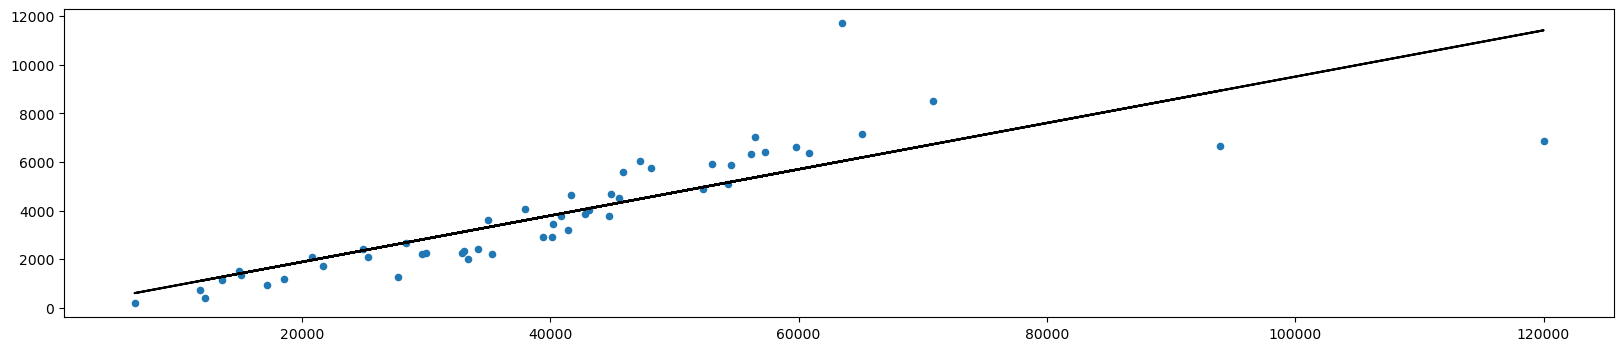

In [23]:
# Plot 2022 GDP per Capita data
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(111)

x_values = gdp_health_df_2020['GDP per capita, PPP (current international $)']
y_values = gdp_health_df_2020['Current health expenditure per capita, PPP (current international $)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

ret = ax1.scatter(x_values, y_values, s=20)
ax1.plot(x_values, regress_values, "k-")
.set_color('#66b266')
#ret[51].set_color("#0d4a59")
#ax1.set_xticklabels(gdp_data_2022['Country'], rotation=90)
ax1.set_title('GDP per capita and Health Expenditure per capita, 2020 (PPP, current international $)')
ax1.set_ylabel('Health expenditure per capita', fontsize=7)
ax1.set_xlim(10000, 80000)
ax1.set_ylim(0, 13000)
#ax1.yaxis.set_major_formatter("${x:,.0f}")

In [28]:
gdp_health_df_2020.sort_values(by='Current health expenditure per capita, PPP (current international $)')

gdp_health_df_2020

,Time,Country Name,Country Code,"GDP per capita, PPP (current international $)","Current health expenditure per capita, PPP (current international $)"
102,2020,Australia,AUS,53066.490989,5929.983600
103,2020,Austria,AUT,57258.690227,6400.895378
104,2020,Belgium,BEL,54569.925385,5883.081420
105,2020,Canada,CAN,47226.365140,6049.902410
106,2020,Czechia,CZE,42827.060006,3846.020647
107,2020,Denmark,DNK,60832.158291,6350.520949
108,2020,Finland,FIN,52305.289311,4896.908506
109,2020,France,FRA,48134.959795,5740.382129
110,2020,Germany,DEU,56482.475634,7031.941977
111,2020,Greece,GRC,28416.523902,2652.950761


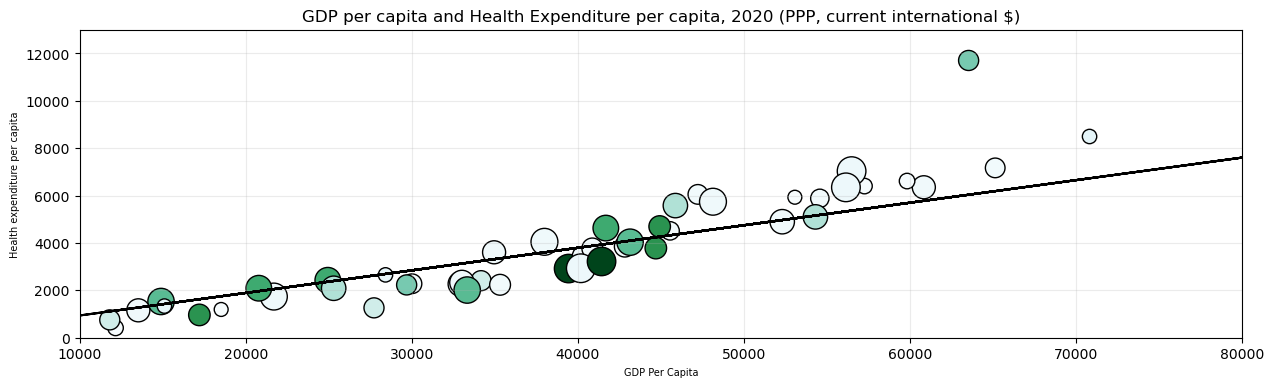

<Figure size 640x480 with 0 Axes>

In [32]:
# Scatter Plot : Gdp per Capita Vs. Health Expenditure per capita (PPP, current international $)

# Determine x & y values
x_values = gdp_health_df_2020['GDP per capita, PPP (current international $)']
y_values = gdp_health_df_2020['Current health expenditure per capita, PPP (current international $)']

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Colors for color mapping
colors=[1300, 2500, 4500, 5000, 5200, 5500, 5900, 6200, 7500, 
        12000, 21000, 28000, 40000, 47000, 55000, 62000, 85420, 1300, 2500, 4500, 5000, 5200, 5500, 5900, 6200, 7500, 
        12000, 21000, 28000, 40000, 47000, 55000, 62000, 85420, 1300, 2500, 4500, 5000, 5200, 5500, 5900, 6200, 7500, 
        12000, 21000, 28000, 40000, 47000, 55000, 62000, 85420]

# Scatter data point sizes based on datapoint value
sizes = [100, 125, 175, 200, 225, 275, 309, 375, 425, 107, 208, 309, 209, 360, 340, 240, 420, 
         100, 125, 175, 200, 225, 275, 309, 375, 425, 107, 208, 309, 209, 360, 340, 240, 420, 
         100, 125, 175, 200, 225, 275, 309, 375, 425, 107, 208, 309, 209, 360, 340, 240, 420]

# Figure size
plt.figure(figsize=(15,4))

# Scatter plot x & y values. Add aesthetics
plt.scatter(x_values,y_values, c=colors, cmap='BuGn', 
            s= sizes, edgecolor='black', linewidth= 1, alpha=1) 
plt.plot(x_values, regress_values, "k-")

# Set x & y limits
plt.xlim(10000, 80000)
plt.ylim(0, 13000)

# Set plot lables & title
plt.xlabel('GDP Per Capita', fontsize=7)
plt.ylabel('Health expenditure per capita', fontsize=7)
plt.title('GDP per capita and Health Expenditure per capita, 2020 (PPP, current international $)')
plt.grid(alpha=.25)
plt.show()
plt.savefig('Output/gdp_health_exp_scatter.pdf')
